**Project Aim** <br>
The aim of this project is to implement and compare a range of dimension reduction algorithms
- Create a comprehensible EDA structure 
- How many features can explain the same amount or limited variance compared to eachother
- Implement a set of linear dimension reduction algorithms and compare results

**Dataset Notes**
- Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.


**Project Assumptions** <br>
- Porto Driving Data
    - The target values are binary labels which 1 means that claim was filed
    - The suffix bin is used for binary features;
    - The suffix cat to is used for categorical features;
    - Features without the bin or cat indications are real numbers (continuous values) of integers (ordinal vlaues);
    - A missing value is indicated by -1
    - The value that is subject of prediction is in the target column. This one indicates whether or not a claim was filed for that insured person;
    - id is a data input ordinal number.
- MNIST Image Dataset
    - No EDA required as already considered as part of SVM project

**Project Objective** <br>
Exploratory Data Analysis <br>
~~- Create an EDA framework~~
    - ~~Pandas Profiling~~ 
    ~~- Add some more complex graphics ~~
        - ~~Boxenplots~~
        - ~~Clustered Heatmap~~
~~- Categorical Variable Feature Engineering (refer to Chapter 5 feature Engineering)~~
~~- Fit a linear model for a single category for each encoding type~~
    - ~~One-Hot Encoding~~
    - ~~Dummy Factor Encoding~~ 
    - ~~Hash Encoding(Dealing with Large Categorical Variables: Implement an example of Feature Hashing)~~
- Implement an example of bin counting (should the data meet the required assumption) and leverage group by to generate totality statistics
    - Create raw count features
    - Create odds-ratio (and log-odds ratio)
- Implement a solution to deal with Rare-Categories
- Highlight if there are any unbounded count categories and create normalised count features if required
<br>

Implement a range of Dimension Reduction Algorithms
- Missing Value Ratio
- Low Variance Filter
- Correlation (inc. High Correlation Filter)
    - Implement correlation and calculate the percentage of variation (r-sq) explained by a subsample of predictors (only numerical values)
    - For correlation calculate statistical significance to highlight the probability of error within the identified correlations and output the sample size (as sample size can impact outcomes significantly)
- PCA (and incremental/randomised/Kernel plus how to select the best kernel PCA) and compare the results
    - Apply Standard PCA and calculate the reconstruction error (sklearn book page 221)
    - Apply incremental & Randomised PCA (sklearn book page 217/218)
    - For PCA output statistics (loadings & scores) regarding the components and plot a scree plot
    - Determine the optimal number of dimensions 
- Kernal PCA (with grid search) applied to MNIST dataset (sklearn book page 218)
- ZCA applied to the MNIST dataset
- Factor Analysis --- Categorical Data
    - Complete exploratory factor analysis (describe function - R book page 249)
    - Complete confirmatory factor analysis (determine the degree of uniqueness, factor loadings and factor matrix - R book page 249)
    - Calculate the model degree of freedom and determine the factor limit (i.e. when are two many factors attempting to be used in relation to the number of variables available - R book page 250/252)

Evaluation Techniques
- Calculate explained variance ratio
- Plot and select the correct number of dimenions that retain 95% variability 
- Reverse the projection for PCA and calculate the reconstruction error

Project Clouse Good Practice
- Neatly store: Date/Data set/Pickle Model
- Document brief conclusions

**Dimension Reduction Notes** <br>
- Label Encoding
    - label encoding involves the conversion of a category to a number, however, it induces a problem since it uses number sequencing such that it introduces variable realationships that may not exist <br>

Out of scope feature selection methods can also be used for dimension reduction:
- Random Forest <br>
    - Add brief notes <br>
- Backward Feature Elimination <br>
    - Add brief notes <br>
- Forward Feature Selection <br>
    - Add brief notes <br>

**Conclusions** <br>

**Extra Work** <br>
Data Preparation and Exploration Techniques
- Creating interaction variables

Implement a solution to deal with Rare-Categories <br>
- Example Variable: ps_car_10_cat
- Method One: Back-off Technique
    - One way to deal with this is through back-off, a simple technique that accumulates the counts of all rare categories in a special bin <br>
    - If the count is greater than a certain threshold, then the category gets its own count statistics. Otherwise, we use the statistics from the back-off bin. This essentially reverts the statistics for a single rare category to the statistics computed on all rare categories
- Method Two: Count-Min Sketch Technique
    - All the categories, rare or frequent alike, are mapped through multiple hash functions with an output range, m, much smaller than the number of categories, k. When retrieving a statistic, recompute all the hashes of the category and return the smallest statistic. Having multiple hash functions mitigates the probability of collision within a single hash function. 
    - The scheme works because the number of hash functions times m, the size of the hash table, can be made smaller than k, the number of categories, and still retain low overall collision probability

Non-linear Dimension Reduction Algorithms (separate notebook)
- BPDR (Backward Progressive Dimensionality Reduction)
- ICA
    - Technique to uncover or verify statistically independent variables or dimensions in high-dimensional data
    - Complete ICA preprocessing (centering & whitening - Transform a data point linearly so components are uncorrelated and of equal unity)
    - Implement two methods for defining independence in ICA (Minimization of Mutual Information/Non-Gaussianity Maximization)
- NNMF (a.k.a NMF)
- LDA (and applied to K-Means)
- Local linear Embeddings 
- Non-Linear Dimension Reduction: (t-SNE/IsoMap/MDS)

**Potential Gotchas** <br>
- Do not include more than 4 variables in a single plot. Instead of being useful, unnecessary variables add an extra level of difficulty to plots making them hard to interpret.

**References** <br>
https://towardsdatascience.com/organize-your-data-and-models-using-the-object-oriented-programming-and-pickle-876a6654494 <br>
https://towardsdatascience.com/my-6-part-powerful-eda-template-that-speaks-of-ultimate-skill-6bdde3c91431 <br>
https://www.kaggle.com/piantic/osic-pulmonary-fibrosis-progression-basic-eda <br>
https://medium.com/analytics-vidhya/5-lesser-known-seaborn-plots-most-people-dont-know-82e5a54baea8 <br>
https://www.kaggle.com/sinamhd9/safe-driver-prediction-a-comprehensive-project <br>
https://www.kaggle.com/minarabbit/exploratory-analysis-and-prediction-1 <br>
https://github.com/pandas-profiling/pandas-profiling <br>

In [1]:
# !conda install -c conda-forge pandas-profiling
# !pip install colorama
# !pip install empiricaldist
# !pip install Cython
# !pip install sklearn
# !pip install category_encoders

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model as linear_regression

In [4]:
train_data = pd.read_csv('/Users/Rej1992/Documents/DimensionReduction_RawData/train.csv')
test_data = pd.read_csv('/Users/Rej1992/Documents/DimensionReduction_RawData/test.csv')

In [5]:
#color
from colorama import Fore, Back, Style
print(Fore.YELLOW + 'Train Set !!',Style.RESET_ALL)
print('train data size', train_data.shape)
display(train_data.head())


print(Fore.BLUE + 'Test Set !!',Style.RESET_ALL)
print('test data size', test_data.shape)
display(test_data.head())

print(Fore.YELLOW + "The total patient ids are",Style.RESET_ALL,f"{train_data['id'].count()},", 
      Fore.BLUE + "from those the unique ids are", Style.RESET_ALL, f"{train_data['id'].value_counts().shape[0]}.")

Train Set !! 
train data size (595212, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


Test Set !! 
test data size (892816, 58)


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


The total patient ids are  595212, from those the unique ids are  595212.


In [6]:
print('Columns in train and not in test dataset:', set(train_data.columns) - set(test_data.columns))

Columns in train and not in test dataset: {'target'}


In [7]:
train_ids = set(train_data['id'].unique())
test_ids = set(train_data['id'].unique())

#train_ids.intersection(test_ids)

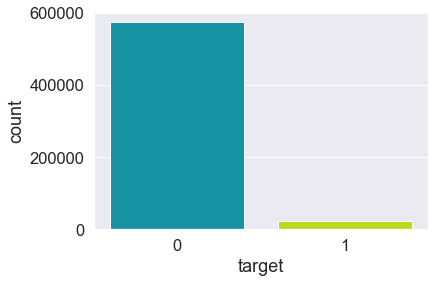

In [8]:
sns.set_style('white')
sns.set_palette("Paired")
sns.set(font_scale=1.5)
plt.figure()
sns.countplot(train_data['target'],palette='nipy_spectral')
plt.show()

**Dealing with Imbalanced Classed**
- The proportion of records with target=1 is far less than target=0
- This can lead to a model that has great accuracy but does have any added value in practice.
- Two possible strategies to deal with this problem are
    - Oversampling records with target=1
    - Undersampling records with target=0
- As we have a rather large training set, we can go for undersampling.

## Exploratory Data Analysis and Data Cleaning

**Issues with the Dataset**
- Missing Values
- Column Heading of the same format
- Columns that can be dropped or are very similar to each other 
- Incorrect Data Types
- Labels in categories mismatch
- Unnecessary categories

**Univariate Exploration**
- Using distribution plots such as histograms, PMF, and PDF plots, CDFs helps you identify the distribution of each numerical feature.
- For categorical features, use bar charts and count plots to see the proportion of each category in the dataset. Again, this is crucial for classification problems because you can calculate metrics like class imbalance before fitting models.

**Bi-variate Exploration**
- Explore both categorical and statistical relationships.
- Compute a correlation matrix to identify <u>linear</u> relationships between numerical features. High positive and negative coefficients suggest a strong positive/negative linear relationship while coefficients close to 0 may indicate non-linear relationships
    - Weak: 0 < r < 0.3
    - Moderate: 0.3 < r < 0.7
    - Strong: 0.7 < r < 1.0
- Create Probability Mass Function Graphs for Categories (Histograms really suck at this because you can’t avoid binning bias and data obscurity.)

**Exploration Key Conclusions**
- 

In [9]:
print(train_data.shape)
train_data = train_data.drop_duplicates()
print(train_data.shape)

(595212, 59)
(595212, 59)


In [10]:
# profile_train_df = pdp.ProfileReport(train_data, 
#                                      minimal = True, # Deals with large datasets
#                                      #explorative=True # includes many features for text 
#                                      title = 'DimReducationProfilingResults',
#                                      progress_bar=True
#                                     )



In [11]:
# profile_train_df

In [12]:
# Save profiling results to JSON
#profile_train_df.to_file('/Users/Rej1992/Documents/GitHub/DimensionReduction/data/06_reporting/DimReducationProfilingResults.json')

**Pandas Profiling Conclusions**


### Basic Exploration

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

**Missing Data**

In [14]:
print('Nan values =', train_data.isnull().sum().sum())
print("""""")

vars_with_missing = []

for feature in train_data.columns:
    missings = train_data[train_data[feature] == -1][feature].count()
    
    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / train_data.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Nan values = 0

Variable ps_ind_02_cat has 216 records (0.04%) with missing values.
Variable ps_ind_04_cat has 83 records (0.01%) with missing values.
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values.
Variable ps_reg_03 has 107772 records (18.11%) with missing values.
Variable ps_car_01_cat has 107 records (0.02%) with missing values.
Variable ps_car_02_cat has 5 records (0.00%) with missing values.
Variable ps_car_03_cat has 411231 records (69.09%) with missing values.
Variable ps_car_05_cat has 266551 records (44.78%) with missing values.
Variable ps_car_07_cat has 11489 records (1.93%) with missing values.
Variable ps_car_09_cat has 569 records (0.10%) with missing values.
Variable ps_car_11 has 5 records (0.00%) with missing values.
Variable ps_car_12 has 1 records (0.00%) with missing values.
Variable ps_car_14 has 42620 records (7.16%) with missing values.
In total, there are 13 variables with missing values


- ps_car_03_cat and ps_car_05_cat have a large proportion of records with missing values. Remove these variables.
- For the other categorical variables with missing values, we can leave the missing value -1 as such.
- ps_reg_03 (continuous) has missing values for 18% of all records. Replace by the mean.
- ps_car_11 (ordinal) has only 5 records with misisng values. Replace by the mode.
- ps_car_12 (continuous) has only 1 records with missing value. Replace by the mean.
- ps_car_14 (continuous) has missing values for 7% of all records. Replace by the mean.

<AxesSubplot:>

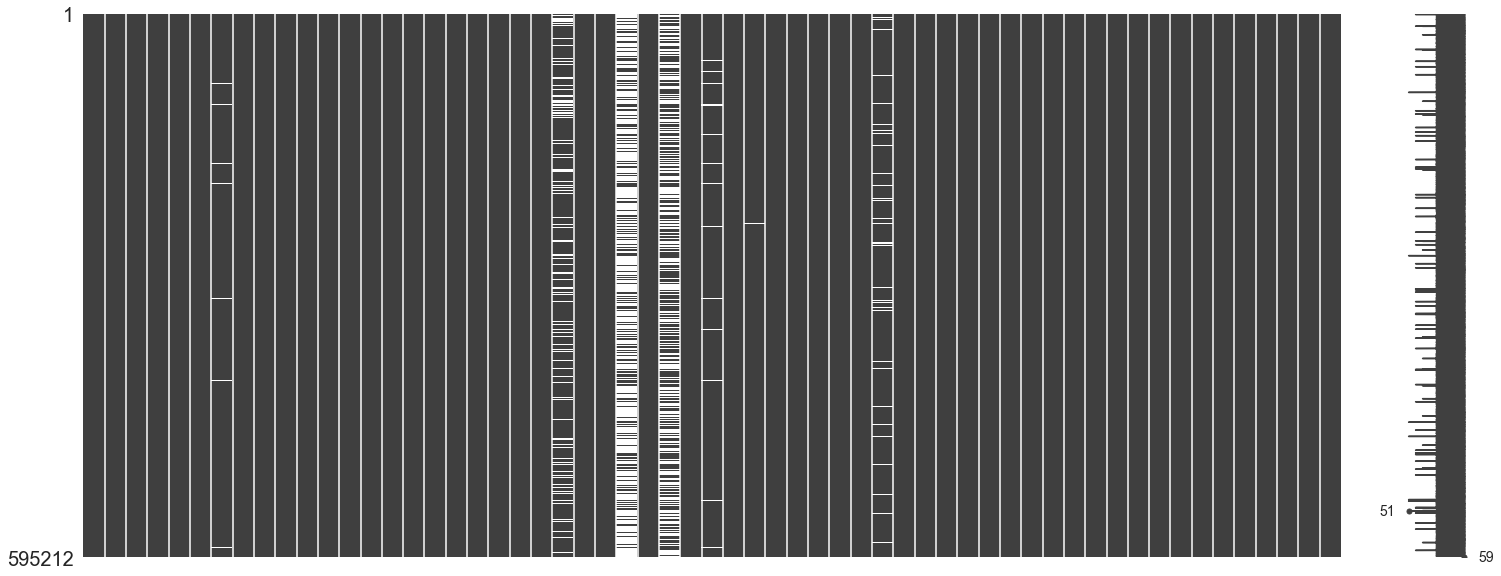

In [15]:
### Missing Value Analysis 
import missingno as msno  # Visualize missing values

missing_data = train_data.replace(-1, np.nan)

%matplotlib inline
msno.matrix(missing_data)

<AxesSubplot:>

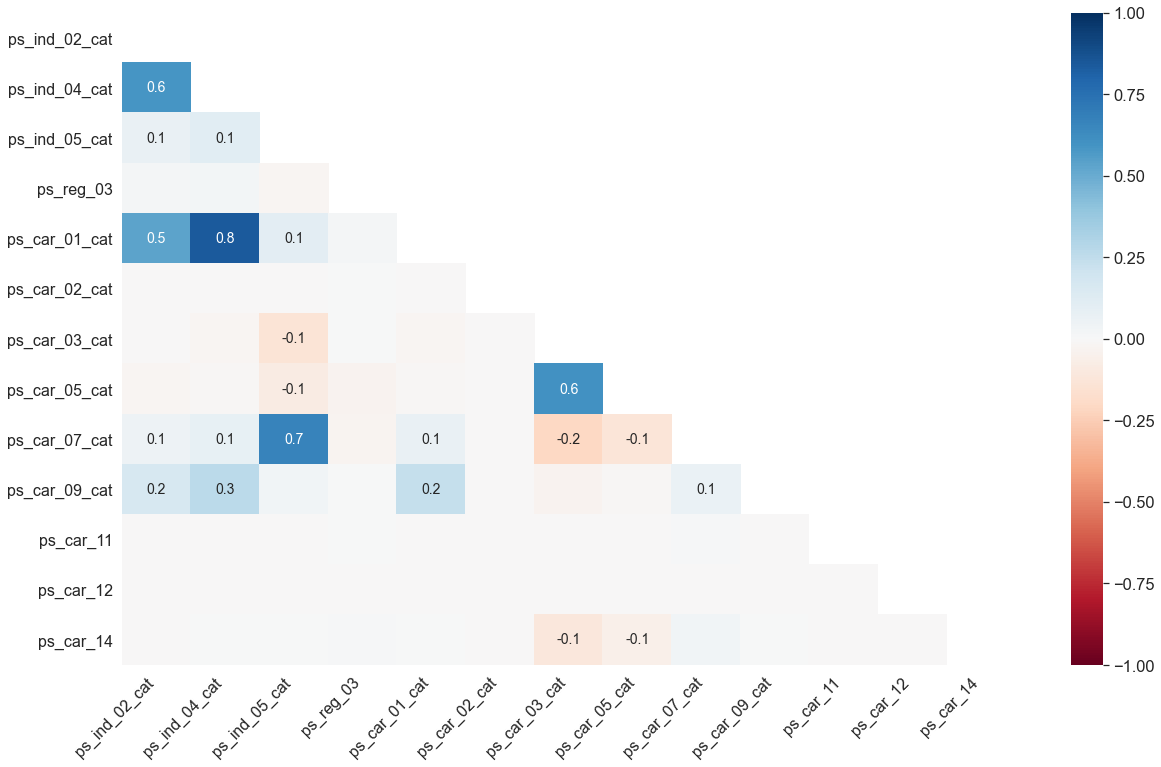

In [16]:
#msno.bar(missing_data)
msno.heatmap(missing_data) # How missing data in one variable impacts others

- ps_ind_01_cat/ps_ind_02_cat/ps_ind_04_cat have the same missing values 
- missing value relationship between ps_car_03_cat/ps_ind_02_cat seems very similar to ps_car_03_cat/ps_ind_04_cat
- missing value relationship between ps_car_07_cat/ps_ind_02_cat seems very similar to ps_car_07_cat/ps_ind_04_cat and ps_car_07_cat/ps_car_01_cat and ps_ind_05_cat/ps_ind_02_cat and ps_ind_05_cat/ps_ind_04_cat 
- Negative relationships may suggest imputational opportunities are they signify cases where missing values exist in one variable but not in another 

<AxesSubplot:>

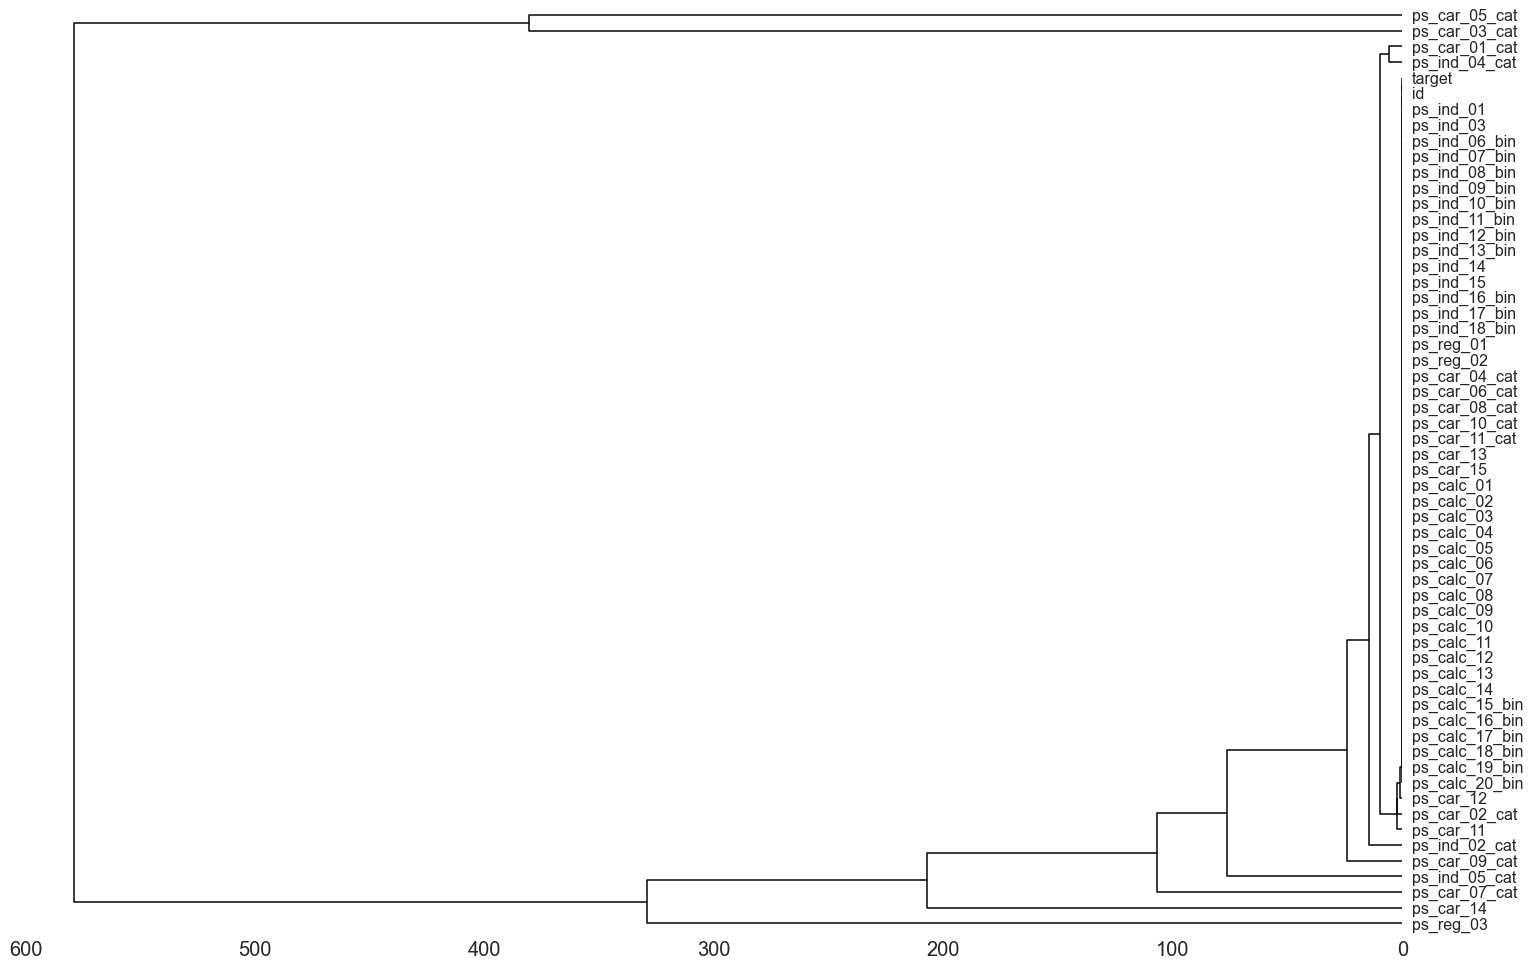

In [17]:
msno.dendrogram(missing_data)

- Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty
- The height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.
- For all variables a maxiumum of 16 rows would need to be dropped or filled to have the same number of missing values in each variable
- Interestingly, althought ps_ind_02_cat/ps_ind_04_cat have the same missing value reltionships with other variables they are unrelated to each other


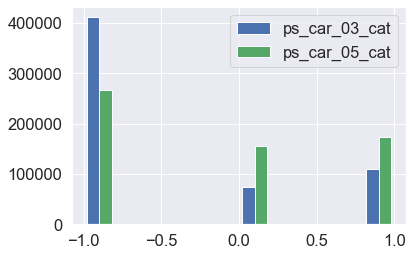

In [18]:
missing_data_1 = train_data[['ps_car_03_cat', 'ps_car_05_cat']]
missing_data_1

from matplotlib import pyplot

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

plt.hist([missing_data_1.ps_car_03_cat, missing_data_1.ps_car_05_cat], label=['ps_car_03_cat', 'ps_car_05_cat'])
plt.legend(loc='upper right')
plt.show()

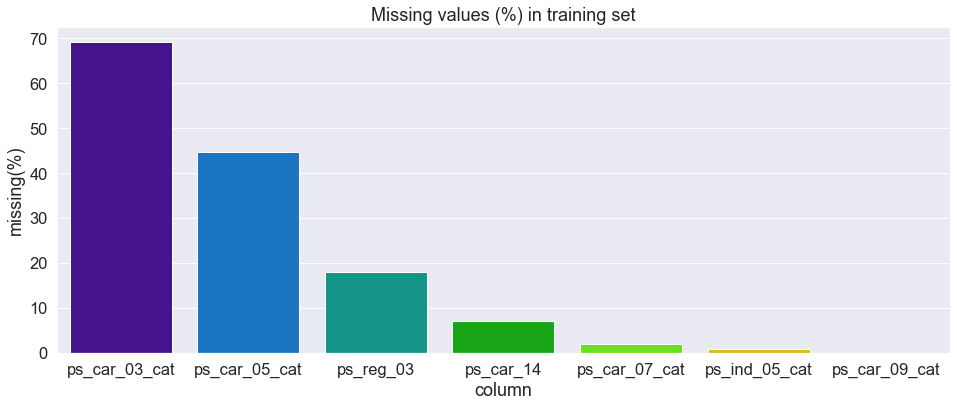

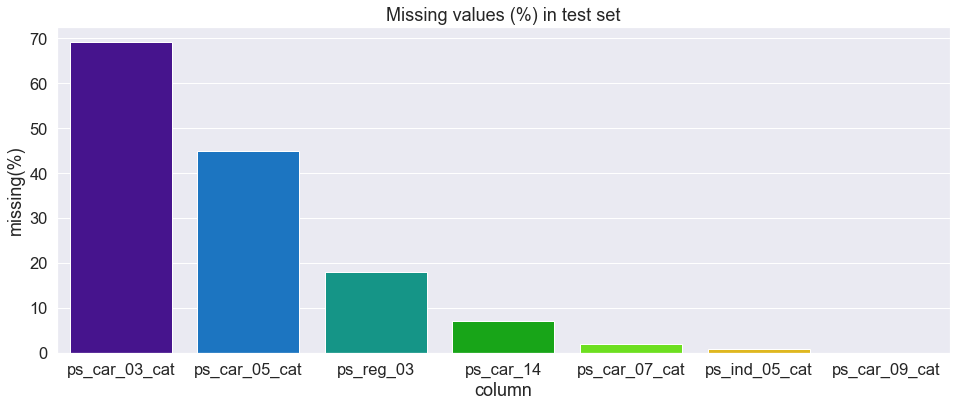

In [19]:
df_missing_train = pd.DataFrame({'column':train_data.columns, 'missing(%)':((train_data==-1).sum()/train_data.shape[0])*100})
df_missing_test = pd.DataFrame({'column':test_data.columns, 'missing(%)':((test_data==-1).sum()/test_data.shape[0])*100})

df_missing_train_nl = df_missing_train.nlargest(7, 'missing(%)')
df_missing_test_nl = df_missing_test.nlargest(7, 'missing(%)')

sns.set_palette(sns.color_palette('nipy_spectral'))

plt.figure(figsize=(16,6))
sns.barplot(data= df_missing_train_nl, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in training set')
plt.show()

plt.figure(figsize=(16,6))
sns.barplot(data= df_missing_test_nl, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in test set')
plt.show()

**Conclusions**
- Missig value proportions tend to be consistent across train and test
- Evidence of missing values: Looks like all values are accounted for. This is supicious and investigate further
    - Missing values are defined as -1
    - 7 Variables in total are impacted by missing values and the distribution of missing values in the train and test data are similar 
- Columns of all the same format: All lowercase and no spaces between words, no further action to be taken
- Data Types Incorrectly Specified: Categorical and Binned data are of the incorrect data type and need to be updated

**Missing Data Treatment**
- As we can see from the variables with missing values, it is a good idea to keep the missing values as a separate 
category value, instead of replacing them by the mode for instance. 
- The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim.

### Data Cleaning

In [20]:
# Create a sample for initial visualisations
train_data = train_data.sample(n = 500) 
y = train_data['target']

In [21]:
# Drop any unnecessary columns
to_drop = ['id', 'target']

# Drop them
train_data.drop(to_drop, axis='columns', inplace=True)

# Use an assert statement that will return nothing if the columns are dropped successfully
assert train_data.columns.all() not in to_drop

In [22]:
def _feature_type_analytics(data, feature_name, data_type, test_column):
    
    features = train_data.columns.tolist()
    
    cat_features = [c for c in features if feature_name in c]
    data[cat_features] = data[cat_features].apply(lambda x: pd.Categorical(x)) # Correct columns to their correct data type
    
    bin_features = [b for b in features if 'bin' in b]
    train_data[bin_features] = train_data[bin_features].apply(lambda x: x.astype('object')) # Correct columns to their correct data type

    feature_type_df = data[cat_features]
    
    assert data[test_column].dtype == data_type # Use assert statement to validate logic -- If response there is an error

    return feature_type_df 

In [23]:
### Functionalise
# cat_features_df = _feature_type_analytics(train_data, 'cat', 'category', 'ps_ind_02_cat')
# bin_features_df = _feature_type_analytics(train_data, 'bin', 'object', 'ps_ind_06_bin')

# categorical_data = train_data.loc[:, train_data.columns.str.endswith("_cat")] 
# binned_data = train_data.loc[:, train_data.columns.str.endswith("_bin")] 

In [24]:
### Update features to be of the correct type
features = train_data.columns.tolist()

cat_features = [c for c in features if 'cat' in c]
train_data[cat_features] = train_data[cat_features].apply(lambda x: pd.Categorical(x)) # Correct columns to their correct data type
cat_features_df = train_data[cat_features]
assert cat_features_df['ps_ind_02_cat'].dtype == 'category' # Use assert statement to validate logic -- If response there is an error


bin_features = [b for b in features if 'bin' in b]
train_data[bin_features] = train_data[bin_features].apply(lambda x: x.astype('object')) # Correct columns to their correct data type
bin_features_df = train_data[bin_features]
assert bin_features_df['ps_ind_06_bin'].dtype == 'object' # Use assert statement to validate logic


int_features = train_data.select_dtypes(include=['int64']).columns.tolist()
ordinal_features = [o for o in int_features if ('cat' not in o and 'bin' not in o and 'id' not in o and 'target' not in o )]
ord_features_df = train_data[ordinal_features]
assert ord_features_df['ps_ind_01'].dtype == 'int64' # Use assert statement to validate logic


cont_features = train_data.select_dtypes(include=['float64']).columns.tolist()
cont_features_df = train_data[cont_features]
assert cont_features_df['ps_reg_01'].dtype == 'float64' # Use assert statement to validate logic


**Checking the cardinality of the categorical variables**
- Cardinality refers to the number of different values in a variable. 
- As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. 
- We should handle these variables differently as they would result in many dummy variables.

In [25]:
v = cat_features_df.columns

for f in v:
    dist_values = train_data[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))


Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 2 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 11 distinct values
Variable ps_car_02_cat has 2 distinct values
Variable ps_car_03_cat has 3 distinct values
Variable ps_car_04_cat has 6 distinct values
Variable ps_car_05_cat has 3 distinct values
Variable ps_car_06_cat has 17 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 5 distinct values
Variable ps_car_10_cat has 2 distinct values
Variable ps_car_11_cat has 96 distinct values


**Conclusions**
- At this stage there is no need to merge categories due to the anonymity of the features used 
- ID and target have been dropped from the training data 
- The dataset contain 4 different data types (categorical/binary/ordinal/cont.)
- Assert statement will return no reponse provide that the logic has been applied correctly
- A categorical variance with over 10 individual levels is curious (further investigate ps_car_01_cat, ps_car_06_cat, and ps_car_11_cat)

### Univariate Exploration


**Categorical Data**

<Figure size 432x288 with 0 Axes>

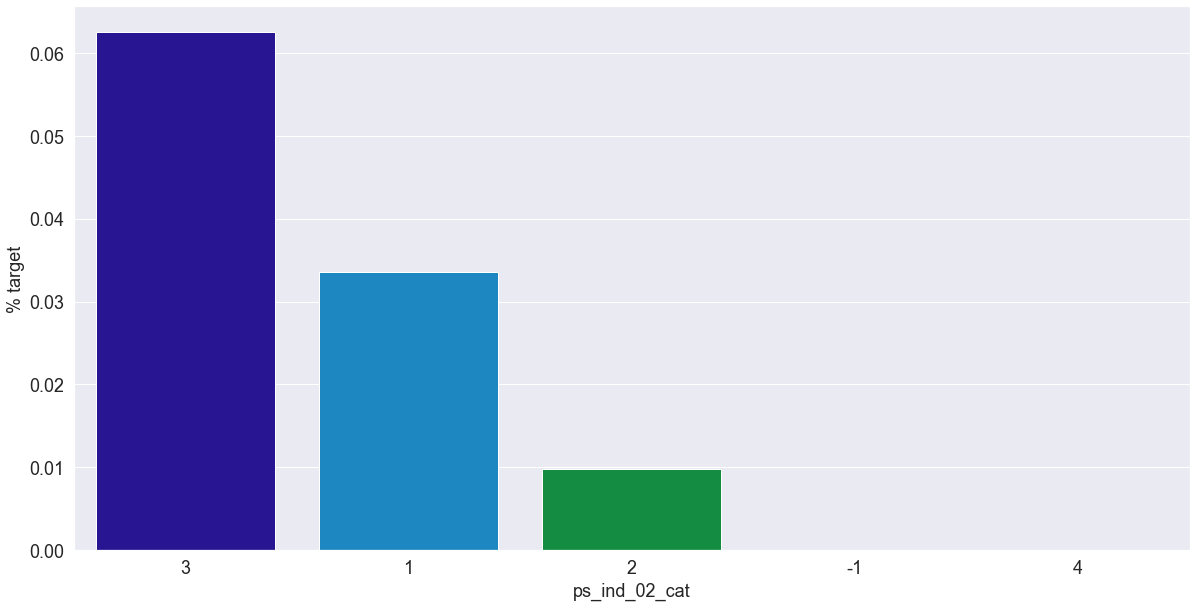

<Figure size 432x288 with 0 Axes>

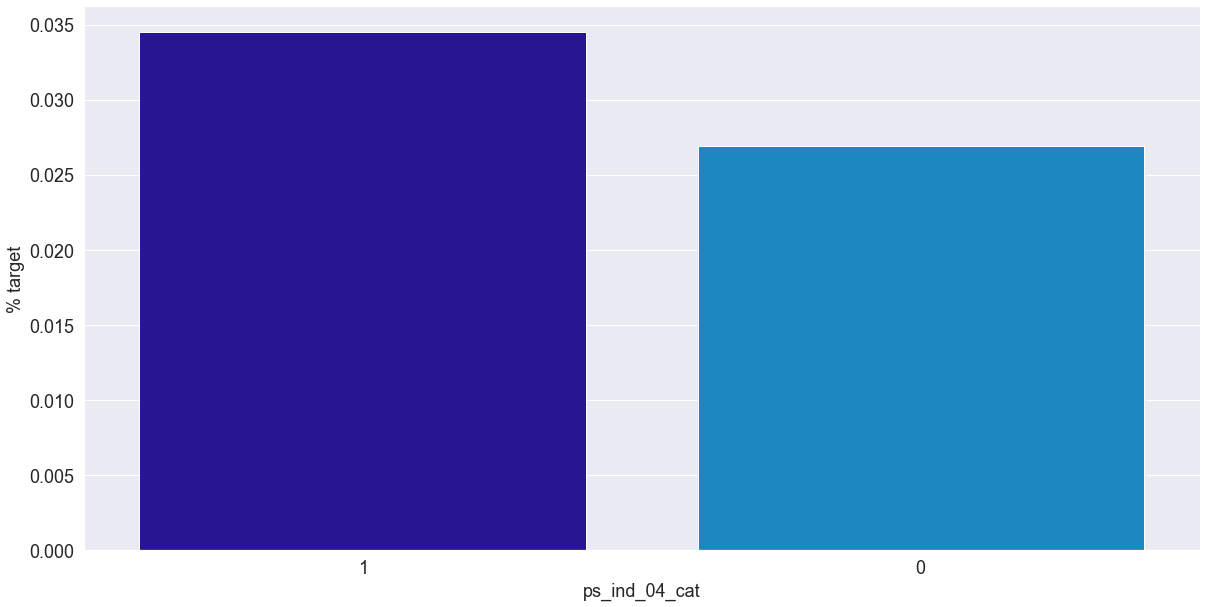

<Figure size 432x288 with 0 Axes>

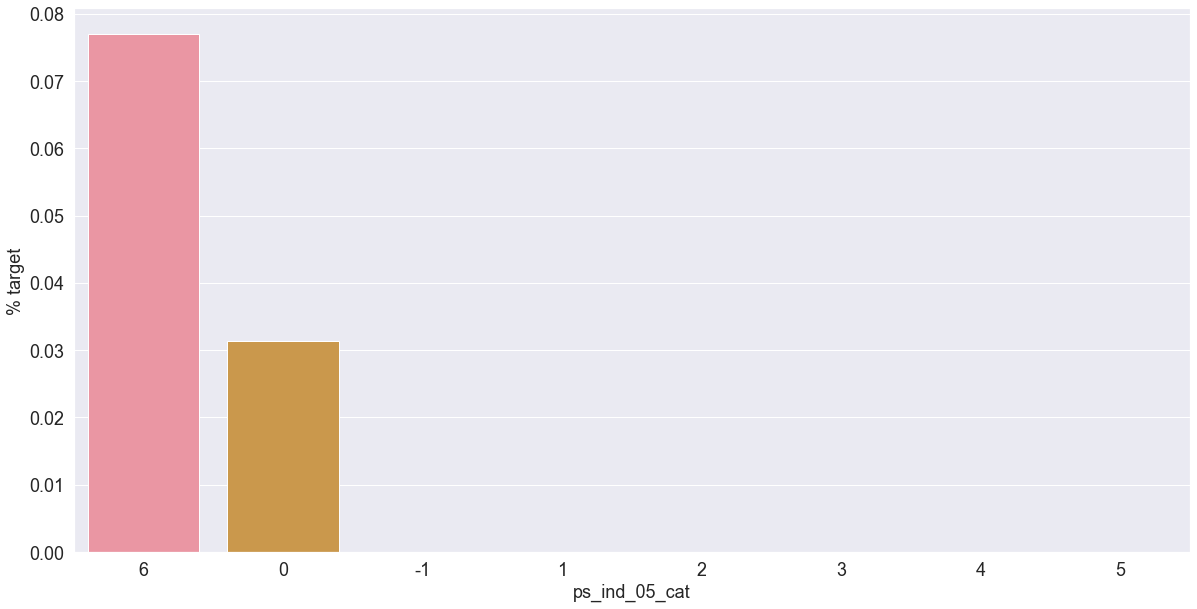

<Figure size 432x288 with 0 Axes>

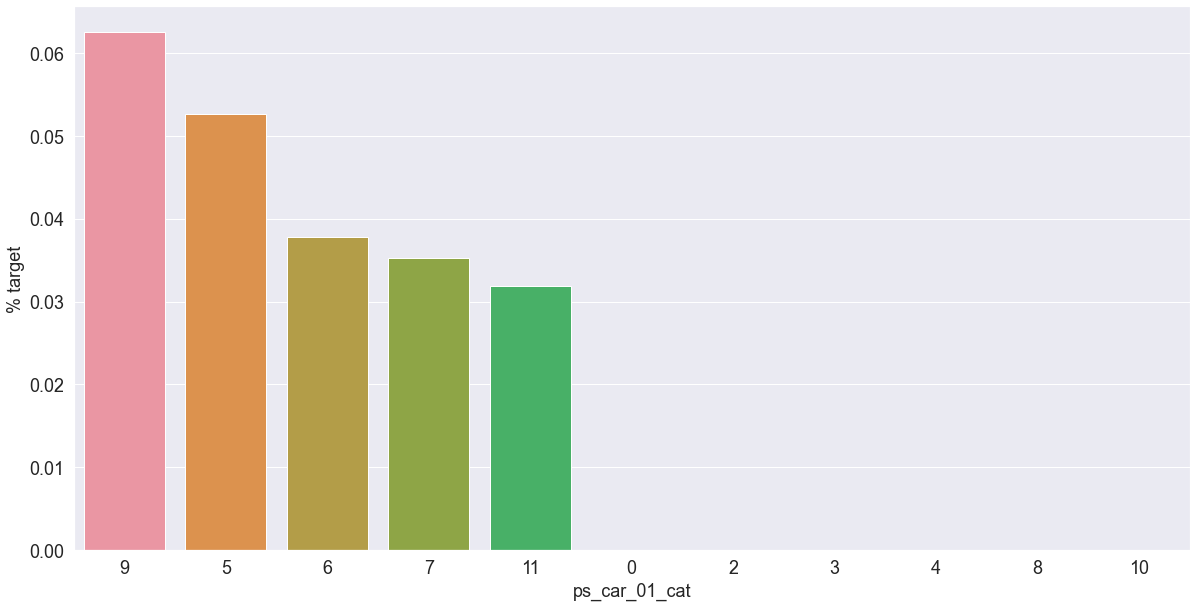

<Figure size 432x288 with 0 Axes>

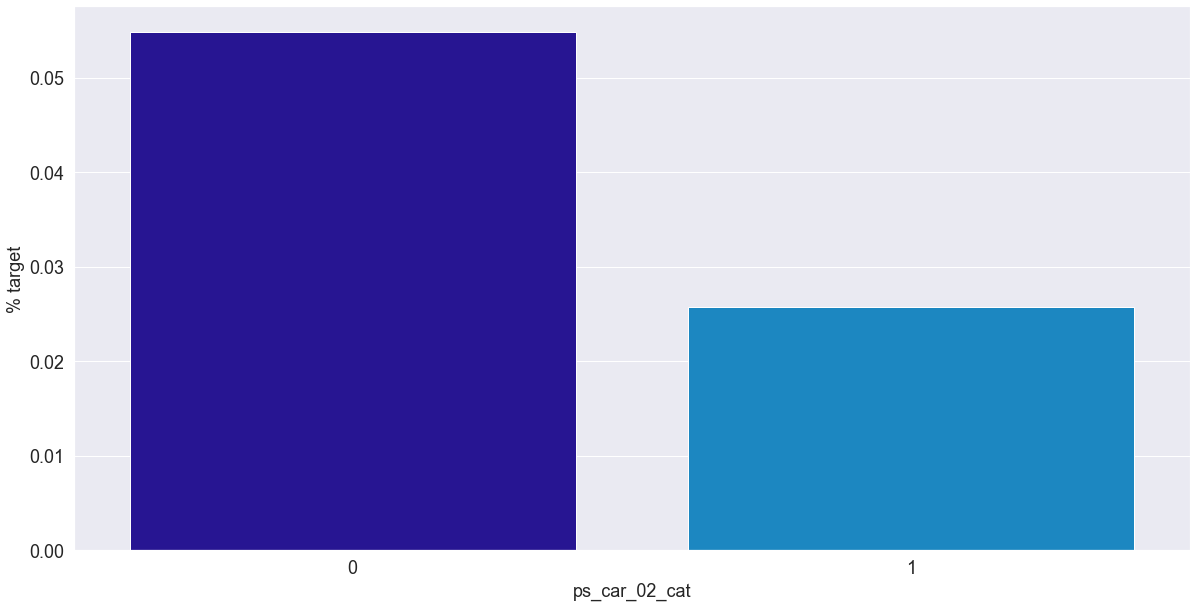

<Figure size 432x288 with 0 Axes>

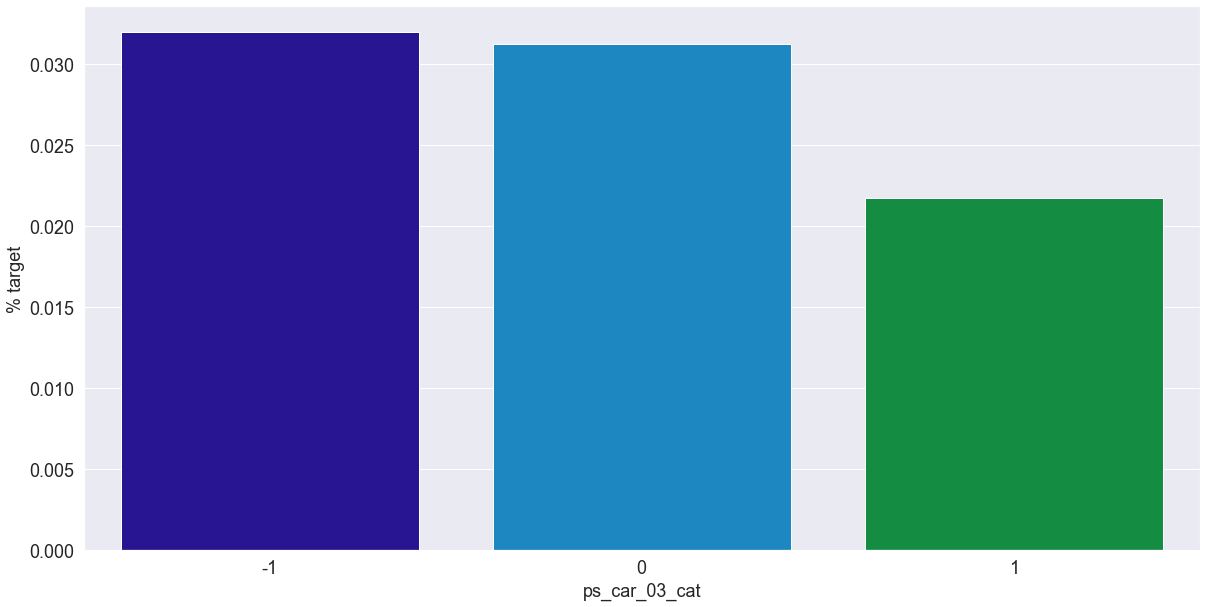

<Figure size 432x288 with 0 Axes>

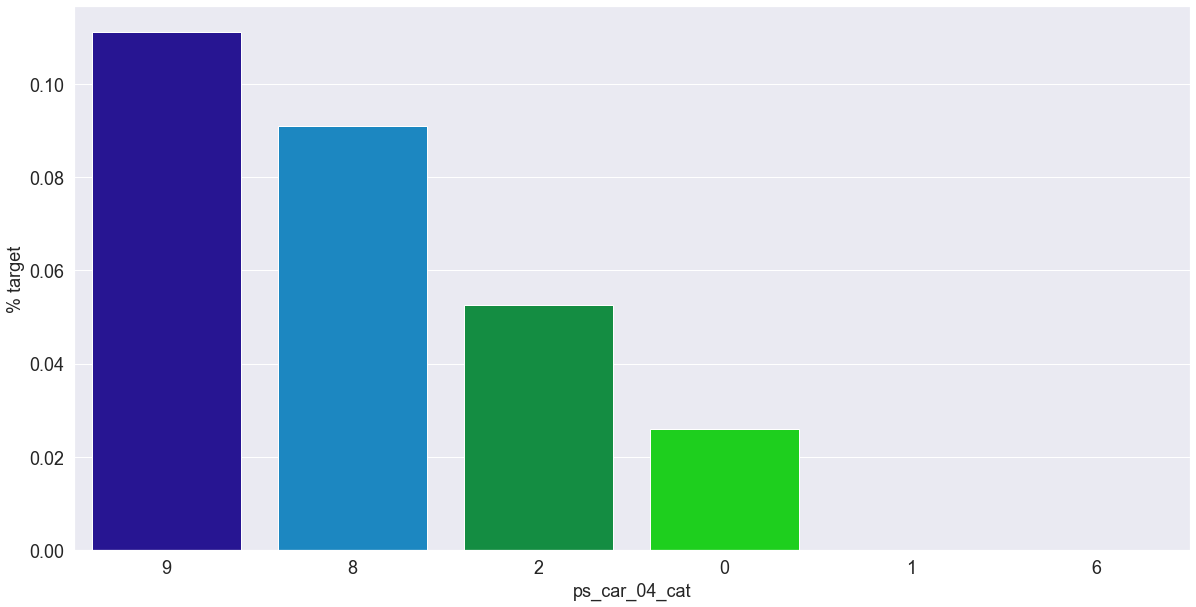

<Figure size 432x288 with 0 Axes>

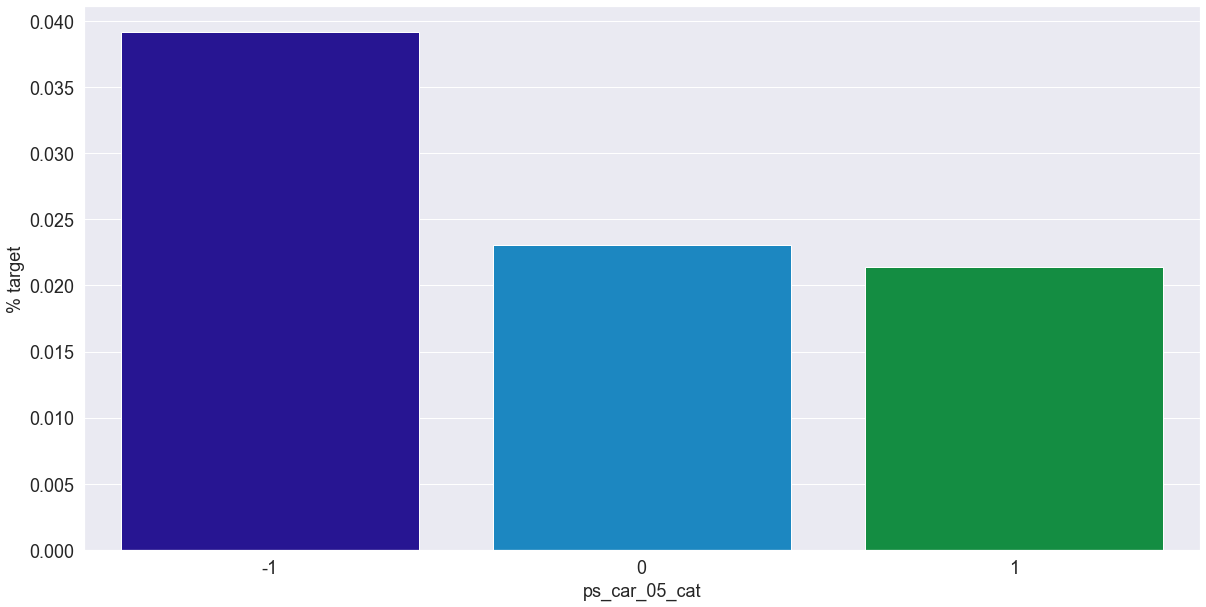

<Figure size 432x288 with 0 Axes>

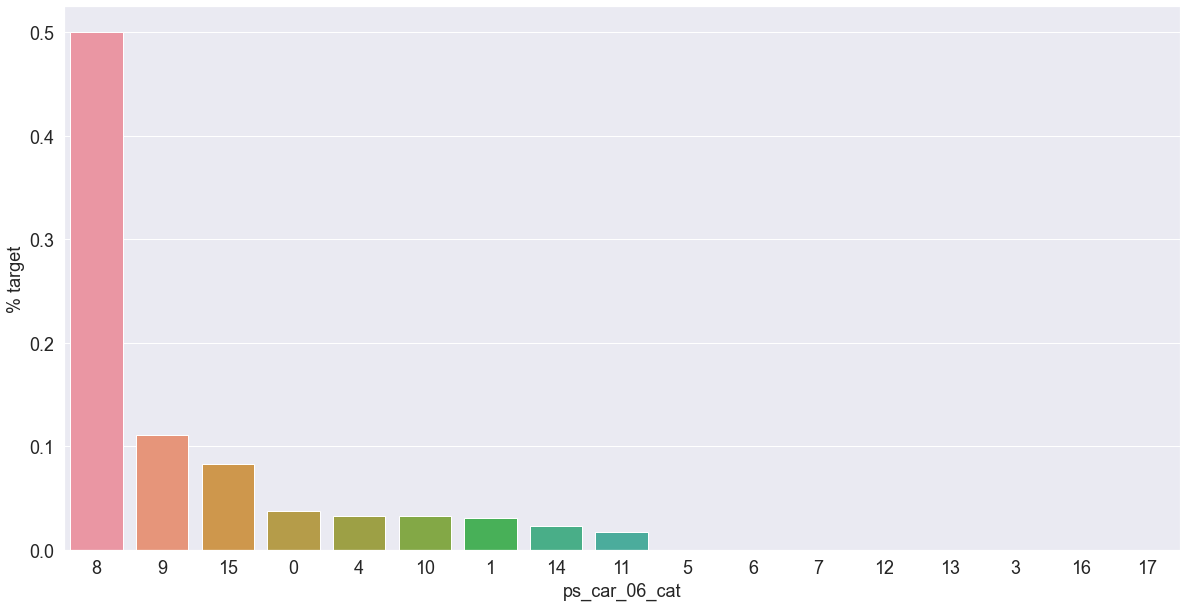

<Figure size 432x288 with 0 Axes>

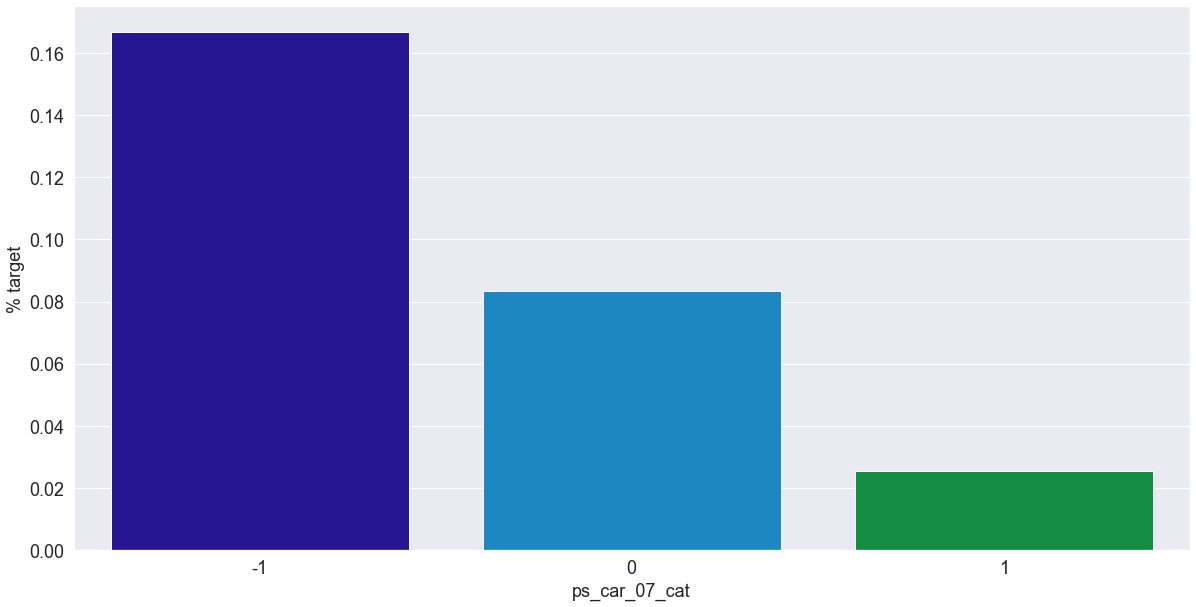

<Figure size 432x288 with 0 Axes>

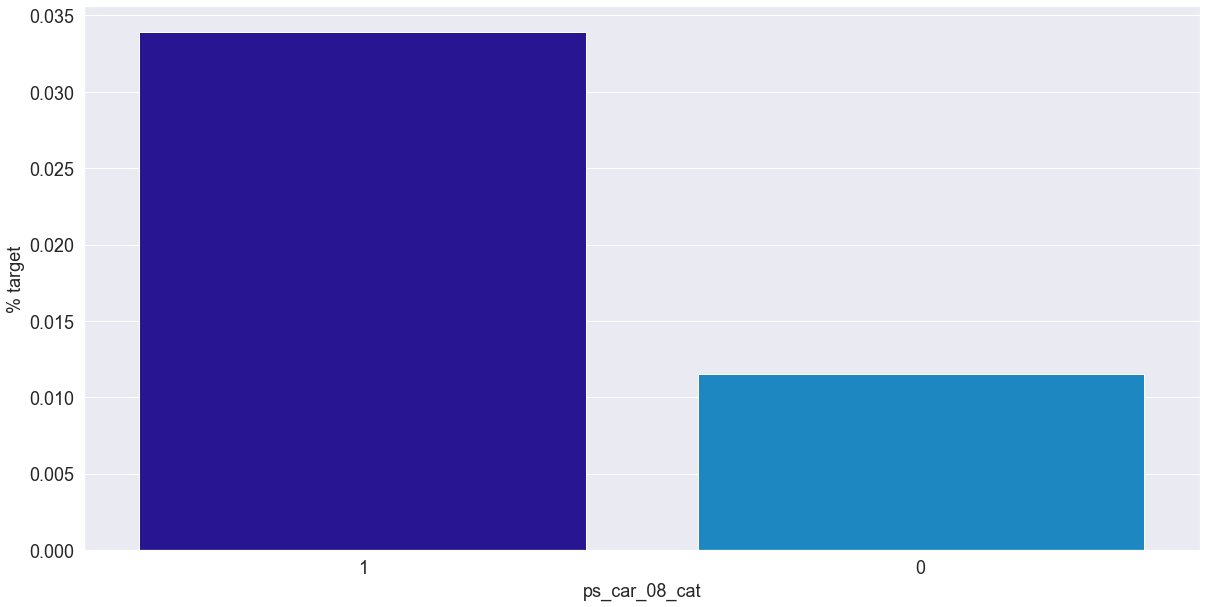

<Figure size 432x288 with 0 Axes>

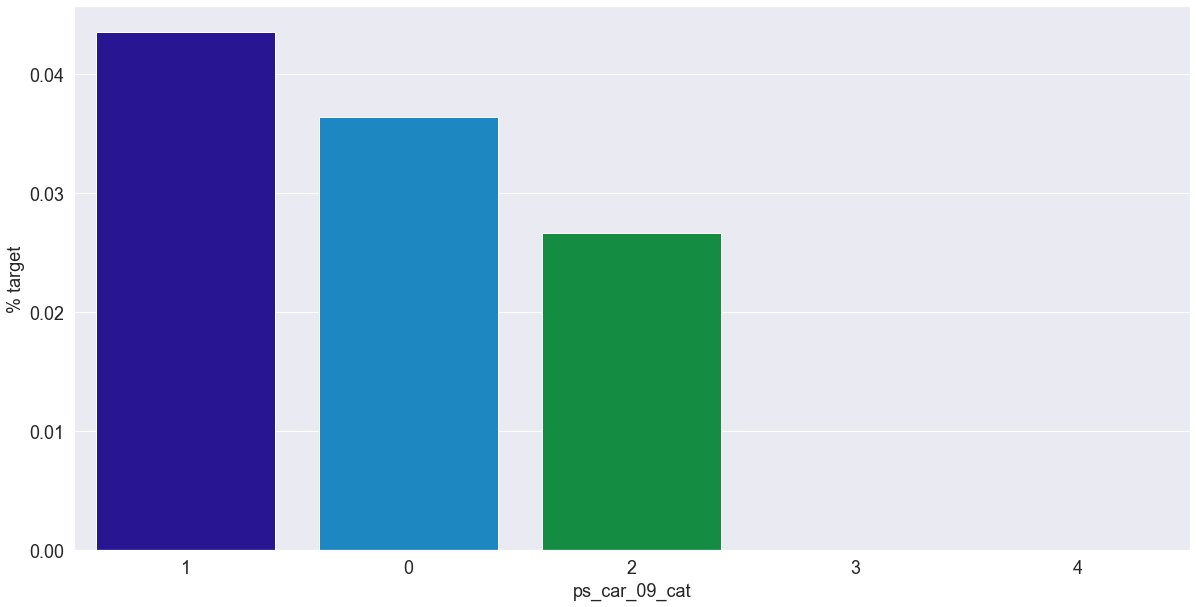

<Figure size 432x288 with 0 Axes>

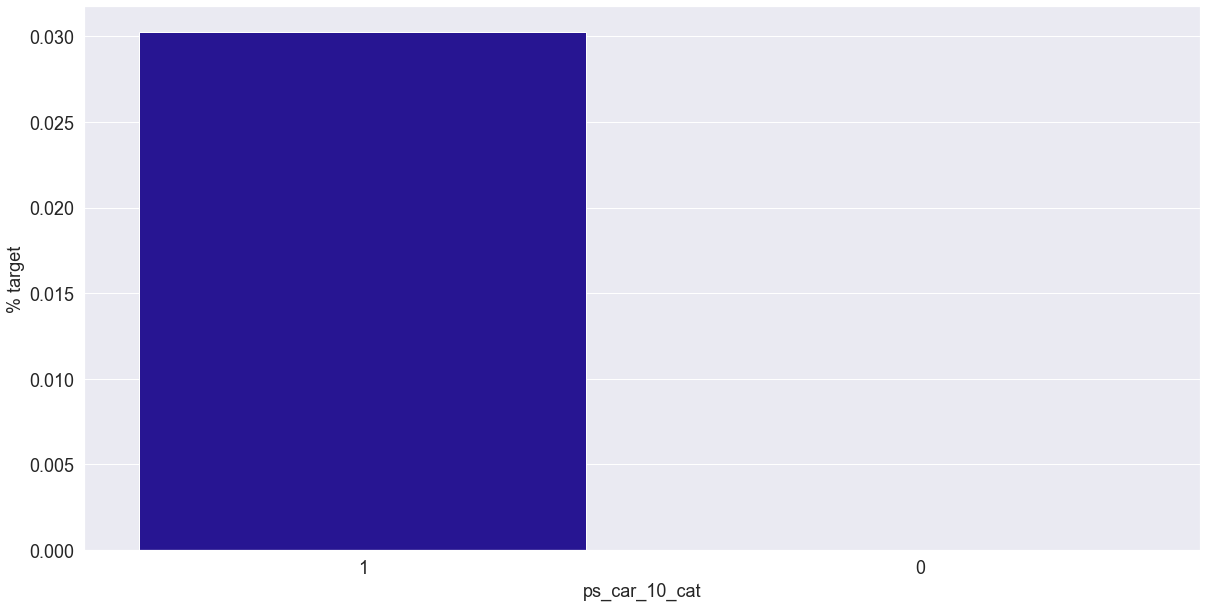

<Figure size 432x288 with 0 Axes>

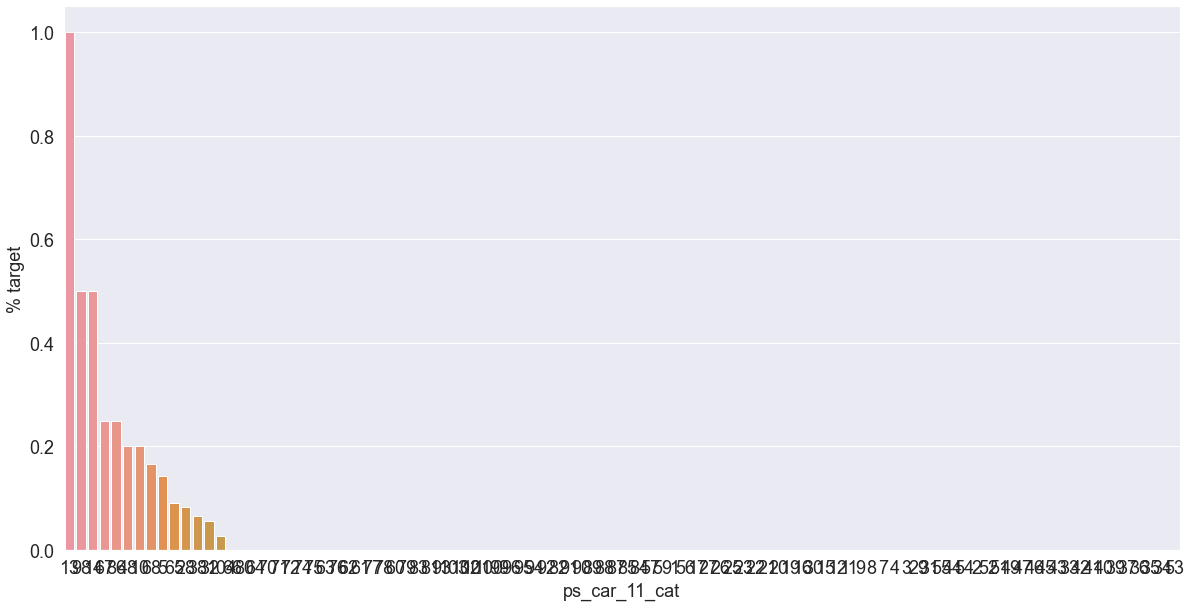

In [34]:
v = cat_features_df.columns
data = train_data.merge(y.rename('target'), left_index=True, right_index=True)

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    
    # Calculate the percentage of target=1 per category value
    cat_perc = data[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

ps_ind_02_cat


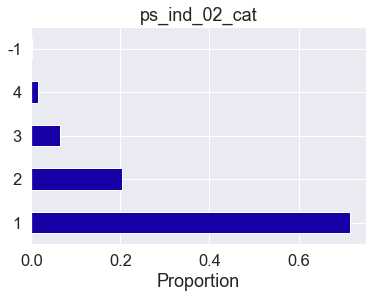

ps_ind_04_cat


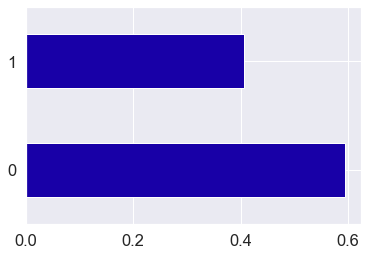

ps_ind_05_cat


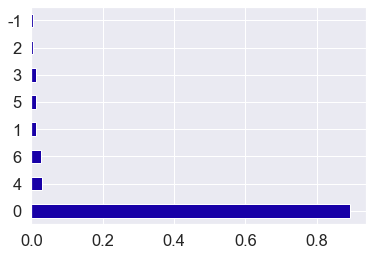

ps_car_01_cat


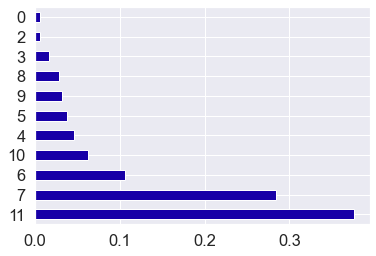

ps_car_02_cat


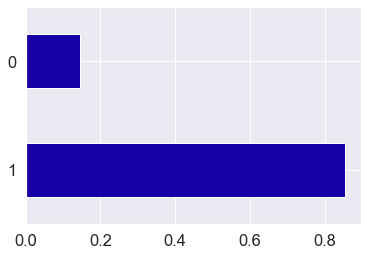

ps_car_03_cat


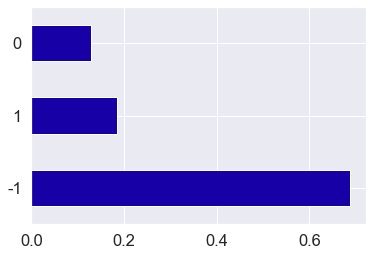

ps_car_04_cat


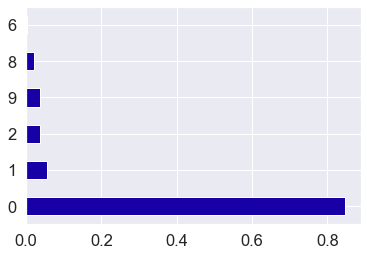

ps_car_05_cat


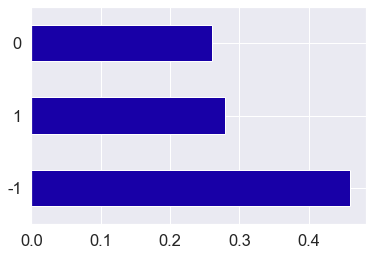

ps_car_06_cat


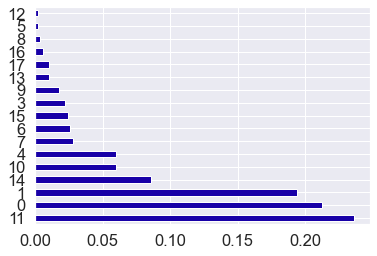

ps_car_07_cat


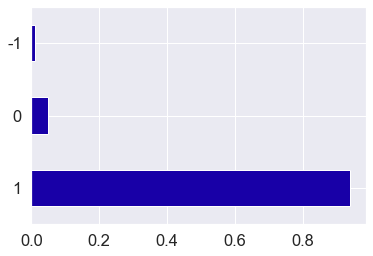

ps_car_08_cat


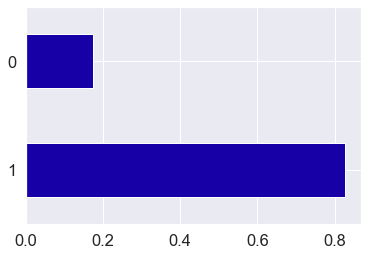

ps_car_09_cat


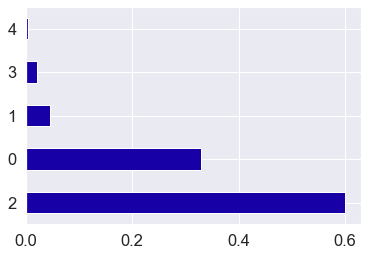

ps_car_10_cat


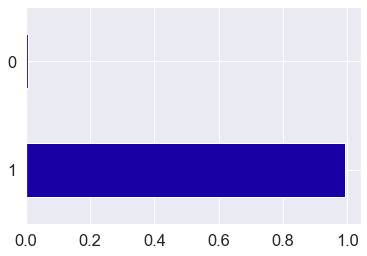

ps_car_11_cat


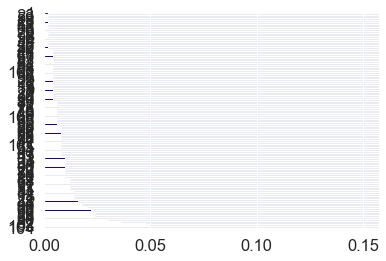

In [99]:
fig, ax = plt.subplots()

# Plot a normalized countplot
for f in v:
    print(f)
    cat_features_df[f].value_counts(normalize=True).plot.barh()

    # Label
    ax.set(title=f,
           xlabel='Proportion', ylabel='')

    plt.show();

In [36]:
cat_features_df.describe()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,500,500,500,500,500,500,500,500,500,500,500,500,500,500
unique,5,2,8,11,2,3,6,3,17,3,2,5,2,96
top,1,0,0,11,1,-1,0,-1,11,1,1,2,1,104
freq,358,297,447,188,427,344,423,230,118,470,413,300,496,75


**Categorical Variable Feature Engineering (refer to Chapter 5 feature Engineering)**
- One Hot Encoding
    - If the variable cannot belong to multiple categories at once
    - A categorical variable with k possible categories is encoded as a feature vector of length k
    - Generates Linear dependent features which can cause issues because they mean that the trained linear models will not be unique
    - The problem with one-hot encoding is that it allows for k degrees of freedom, while the variable itself needs only k–1
- Dummy Encoding
    - Remove the extra degree of freedom
    - One feature is thrown under the bus and represented by the vector of all zeros. This is known as the reference category
    - Generally more interpretable that one-hot encoding
    - Cannot easily handle missing data
- Hash Feature
    - This class is a low-memory alternative to DictVectorizer and CountVectorizer, intended for large-scale (online) learning and situations where memory is tight, e.g. when running prediction code on embedded devices.
    - Implements the hashing trick
- Effect Coding (Extra Work: Out of scope)
    - Effect coding is very similar to dummy coding, with the difference that the reference category is now represented by the vector of all –1’s.
    - Results in linear regression models that are even simpler to interpret
    -  The intercept term represents the global mean of the target variable, and the individual coefficients indicate how much the means of the individual categories differ from the global mean. (This is called the main effect of the category or level, hence the name “effect coding.”)
    - The vector of all –1’s is a dense vector, which is expensive for both storage and computation
https://www.repath.in/gallery/feature_engineering_for_machine_learning.pdf

In [37]:
categorical_feature_eng = cat_features_df[['ps_ind_02_cat']]#, 'ps_ind_05_cat', 'ps_car_07_cat']]
high_categorical_feature_eng = cat_features_df[['ps_car_11_cat']]

In [38]:
# One-Hot Encoding
one_hot_df = pd.get_dummies(categorical_feature_eng)
one_hot_df = pd.merge(one_hot_df, y, left_index=True, right_index=True) # Merge on index -- Safer than concat

model = linear_regression.LinearRegression()
model.fit(one_hot_df[['ps_ind_02_cat_1', 'ps_ind_02_cat_2', 'ps_ind_02_cat_3', 'ps_ind_02_cat_4']],
          one_hot_df['target'])

display(model.coef_)
display(model.intercept_)

array([3.35195531e-02, 9.80392157e-03, 6.25000000e-02, 6.13875270e-16])

-6.210310043996969e-16

In [39]:
# Dummy Encoding
import pandas
dummy_df = pd.get_dummies(categorical_feature_eng, prefix=['ps_ind_02_cat'], drop_first = True)
dummy_df = pd.merge(dummy_df, y, left_index=True, right_index=True) # Merge on index -- Safer than concat

model = linear_regression.LinearRegression()
model.fit(dummy_df[['ps_ind_02_cat_2', 'ps_ind_02_cat_3', 'ps_ind_02_cat_4']], # 'ps_ind_02_cat_1' become level 0
          dummy_df['target'])

display(model.coef_)
display(model.intercept_)

array([-0.02362226,  0.02907382, -0.03342618])

0.03342618384401113

In [61]:
train_data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
166767,2,1,2,0,0,0,0,0,1,0,...,5,3,6,5,0,1,1,0,0,1
497261,0,1,7,0,0,1,0,0,0,0,...,5,0,1,4,1,1,1,0,1,0
43053,0,2,2,0,0,1,0,0,0,0,...,5,0,6,8,0,0,1,0,0,0
291028,1,1,3,0,0,0,1,0,0,0,...,6,2,2,9,0,1,1,0,1,0
486076,2,1,2,0,0,0,1,0,0,0,...,10,3,7,2,0,1,0,0,1,0


In [81]:
train_data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
166767,2,1,2,0,0,0,0,0,1,0,...,5,3,6,5,0,1,1,0,0,1
497261,0,1,7,0,0,1,0,0,0,0,...,5,0,1,4,1,1,1,0,1,0
43053,0,2,2,0,0,1,0,0,0,0,...,5,0,6,8,0,0,1,0,0,0
291028,1,1,3,0,0,0,1,0,0,0,...,6,2,2,9,0,1,1,0,1,0
486076,2,1,2,0,0,0,1,0,0,0,...,10,3,7,2,0,1,0,0,1,0


In [92]:
# Dealing with Large Categorical Variables
# The challenge is to find a good feature representation that is memory efficient, yet produces accurate models that 
# are fast to train
# Compress the features. There are two choices:
## a. Feature hashing, popular with linear models
## b. Bin counting, popular with linear models as well as trees
# Feature Hashing Collision: Multiple numbers may get mapped to the same output
from sys import getsizeof
from sklearn.feature_extraction import FeatureHasher

# Define m as equal to the unique number of business_ids
m = len(train_data.ps_car_11_cat.unique())
train_data.ps_car_11_cat = train_data.ps_car_11_cat.astype('string')


h = FeatureHasher(n_features = m, input_type='string')
f = h.transform(train_data['ps_car_11_cat'])

f.toarray()

print('Our pandas Series, in bytes: ', getsizeof(train_data['ps_car_11_cat']))
print('Our hashed numpy array, in bytes: ', getsizeof(f))


Our pandas Series, in bytes:  54090
Our hashed numpy array, in bytes:  56


In [98]:
## Function to process each encoding selection method


- With one-hot encoding, the intercept term represents the global mean of the target variable, Target, and each of the linear coefficients represents how much ps_ind_02_cat on average target differs from the global mean.
- With dummy coding, the bias coefficient represents the mean value of the response variable target for the reference category, which in the example is ps_ind_02_cat. The coefficient for the ith feature is equal to the difference between the mean response value for the ith category and the mean of the reference category.\
- Feature hashing is a technique that can be used to deal with categories with a large number of levels: We can clearly see how using feature hashing will benefit us computationally, sacrificing immediate user interpretability. This is an easy trade-off to accept when progressing from data exploration and visualization into a machine learning pipeline for large datasets

**Implement an example of bin counting (should the data meet the required assumption) and leverage group by to generate totality statistics** <br>
The idea of bin counting is deviously simple: rather than using the value of the categorical variable as the feature, instead use the conditional probability of the target under that value <br>
Instead of encoding the identity of the categorical value, we compute the association statistics between that value and the target that we wish to predict.
- Create raw count features
- Create odds-ratio (and log-odds ratio)

In [130]:
# For each category, we want to calculate: ps_car_08_cat
# Theta = [counts, p(1), p(0), p(1)/p(0)]
def _event_counting(x, bin_column):
    
    bin_class_0 = pd.Series(x[x['ps_car_10_cat'] < 1][bin_column].value_counts(), name='ps_car_10_cat_0')
    bin_class_1 = pd.Series(x[x['ps_car_10_cat'] > 0][bin_column].value_counts(), name='ps_car_10_cat_1')
    
    counts = pd.DataFrame([bin_class_0, bin_class_1]).T.fillna('0')
    
    #counts['total'] = counts[bin_class_0].astype('int64') + counts[bin_class_1].astype('int64')
    
    return counts

def _bin_counting(counts):
    counts['N+'] = counts['ps_ind_03_1'].astype('int64').divide(counts['total'].astype('int64'))
    counts['N-'] = counts['ps_ind_03_0'].astype('int64').divide(counts['total'].astype('int64'))
    counts['log_N+'] = counts['N+'].divide(counts['N-'])
    
    # If we wanted to only return bin-counting properties, we would filter here
    bin_counts = counts.filter(items= ['N+', 'N-', 'log_N+'])
    
    return counts, bin_counts


bin_column = 'ps_car_10_cat'
positive_class = _event_counting(train_data.filter(items=[bin_column, 'bin_class_1']), bin_column)

#device_all, device_bin_counts = _bin_counting(positive_class)

# Check to make sure we have all the devices
#len(device_bin_counts)


TypeError: Unordered Categoricals can only compare equality or not

**Highlight if there are any unbounded count categories and create normalised count features if required**

### Bivariate Exploration

**Probability Mass Function**

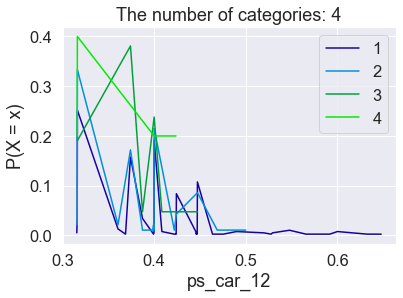

In [44]:
from empiricaldist import Cdf, Pmf

fig, ax = plt.subplots()
# Extract the unique categories
categories = train_data['ps_ind_02_cat'].unique()

for cat in categories:
    pmf_cat = Pmf.from_seq(train_data[train_data['ps_ind_02_cat'] == cat]['ps_car_12'])
    ax.plot(pmf_cat, label=cat)

ax.set(xlabel='ps_car_12',
       ylabel='P(X = x)')

plt.title('The number of categories: {}'.format(len(categories)))

ax.legend()

plt.show();

**Pairs Plot**

In [ ]:
sns.pairplot(cont_features_df)

**Boxenplot and Stripplot**
- The ‘boxenplot’, an expansion of the boxplot, seeks to address the problems of boxplots by adding more quantiles

In [ ]:
import seaborn as sns
# The ‘boxenplot’, an expansion of the boxplot, seeks to address the problems of boxplots by adding more quantiles
sns.boxenplot(train_data.ps_car_14, train_data.ps_car_10_cat)

**Clustered Heatmaps**
- Clustered heatmaps are often used for correlation matrices (correlations between every combination of two features), but can be used for really any matrix, as long as its elements are on the same scale.
- There are many heatmap clustering algorithms and methods, but each of them try to break down a dimension by its most important elements, clustering similar features (perhaps by correlation or another metric) together at a lower level and more distinct elements at a higher level.

In [ ]:
sns.clustermap(ord_features_df) 

In [ ]:
cols = binned_data.columns
for i in cols:
    print(i)
    print(binned_data[i].value_counts())
    print("""""")

## Dimension Reduction Algorithms